# Model likelihood 

We tackle the problem of estimating the optimal parameters $\mathbf{w}$ by specifying a **generative model** for the observations $\{y_n\}$:
$$y_n = f(x_n,\mathbf{w}) + \epsilon,$$
where $\epsilon$ is a zero mean Gaussian distributed noise term with variance $\sigma^2$: $\epsilon\sim \mathcal{N}(0,\sigma^2)$. 
The noise term of the generative model introduces a probabilistic formulation of the observations $\{y_n\}$:
$$p(y|\mathbf{x},\mathbf{w},\sigma^2) = \mathcal{N}(y|f(\mathbf{x},\mathbf{w}),\sigma^2).$$

With this model the observations are random perturbations of the mean function $f(\mathbf{x},\mathbf{w})$, the magnitude of the perturbation depending on the noise parameter $\sigma^2$.
Considering a collection of predictors $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N]^T$ associated to the _independently distributed_ observations $\mathbf{y} = [y_1, y_2, \ldots, y_N]^T$, the joint probability density function of the observations is:

\begin{align*} 
p(\mathbf{y}|\mathbf{X},\mathbf{w},\sigma^2) &= \Pi_{i=1}^N \mathcal{N}(y_i|f(\mathbf{x}_i,\mathbf{w}),\sigma^2) \\
 & = \frac{1}{(2\pi\sigma^2)^{N/2}}\exp(\frac{-1}{2\sigma^2}\sum_{i=1}^N (y_i - f(\mathbf{x}_i,\mathbf{w}))^2)
\end{align*}

This quantity is called the __likelihood__ of the observations $\mathbf{y}$ given the data $\mathbf{X}$ and the parameters $\mathbf{w},\sigma^2$, and the solution of the regression problem is given by the parameters that maximise the likelihood or, equivalently, its logarithm. This solution is called _maximum likelihood_ (ML) estimate of the parameters.
Since the likelihood terms have a Gaussian form, passing to the logarithm gives a nice algebraic form for the __log-likelihood__:
$$\log(p(\mathbf{y}|\mathbf{X},\mathbf{w},\sigma^2)) = \sum_{i=1}^N \log( \mathcal{N}(y_i|f(\mathbf{x}_i,\mathbf{w}),\sigma^2)\\
=  -\frac{N}{2}\log(\sigma^2) - \frac{N}{2}\log(2\pi) - \frac{1}{2\sigma^2}\sum_{i=1}^N (y_i - f(\mathbf{x}_i,\mathbf{w}))^2
$$

**Exercise**: Can you prove this equality?

## The likelihood as predictive distribution

When the paramaters of the model are known, the regression formulation provides us a way to estimate the probability of a prediction at a given point $\mathbf{x}^*$, that will be simply 

$$p(y|\mathbf{x}^*,\mathbf{w}_{ML},\sigma_{ML}^2) = \mathcal{N}(y|f(\mathbf{x}^*,\mathbf{w}_{ML},\sigma_{ML}^2)$$

In the spirit of model comparison, we would like now to assess to what extent the predictions are ''good'', as compared to the hypotetical true distributions of the data. For answering this question in the following sections we will dig a little into the notion of information and divergence. 

### Example: polynomial regression

For polynomial regression of degree $d$, we set $\mathbf{x} = [1, x, x^2, \ldots, x^d]$, and the model $f(\mathbf{x}_i,\mathbf{w})$ becomes:

$$ f(\mathbf{x},\mathbf{w}) = \mathbf{x}\mathbf{w}^T, $$

where $\mathbf{w} = [w_0, w_1, w_2, \ldots, w_d]$ is the vector of regression parameters. The likelihood function is:

\begin{align*} 
p(\mathbf{y}|\mathbf{X},\mathbf{w},\sigma^2) &= \Pi_{i=1}^N \mathcal{N}(y_i|f(\mathbf{x}_i,\mathbf{w}),\sigma^2) \\
 & = \frac{1}{(2\pi\sigma^2)^{N/2}}\exp(\frac{1}{2\sigma^2}\sum_{i=1}^N (y_i - \mathbf{x}_i\mathbf{w}^T)^2)
\end{align*}



With a polynomial model, the maximmum likelihood estimate of the regression parameters are:

$$ \mathbf{w}_{ML} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}, $$

and 

$$ \mathbf{\sigma^2}_{ML} = \frac{1}{N} \sum_{i=1}^N  (y_i - \mathbf{x}_i\mathbf{w}_{ML}^T)^2. $$


The predictive distribution at a point $\mathbf{x}^*$ therefore is $ \mathcal{N} (y|\mathbf{x}^*\mathbf{w}_{ML}^T,\sigma_{ML}^2) $.


The maximum likelihood coefficients are: [  0.15039562   2.71346502  -3.79473818  10.03442256 -18.07283826
   9.11088519] 
and the variance is: 0.09089572041296105


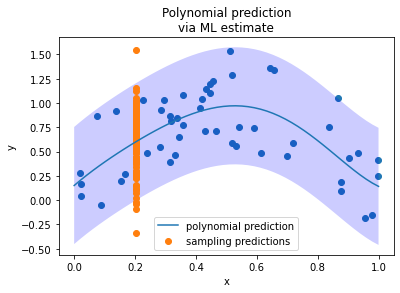

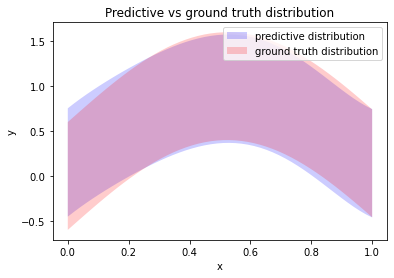

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
noise = 0.3
x = np.random.uniform(0,1,N)
y = np.sin(x*3) + noise * np.random.randn(N)

d = 6

x_poly = np.array([x**i for i in range(d)]).T


w_ml = np.linalg.solve(x_poly.T.dot(x_poly),x_poly.T.dot(y))
w_ml.reshape(1,(len(w_ml)))

sigma2_ml = np.mean((y-x_poly.dot(w_ml.T))**2)

print('The maximum likelihood coefficients are: {} \nand the variance is: {}'.format(w_ml, sigma2_ml))

x_plot = np.linspace(0,1)
x_plot_poly = np.array([x_plot**i for i in range(d)]).T
solution = x_plot_poly.dot(w_ml.T)

plt.scatter(x,y)
plt.plot(x_plot, solution, label = 'polynomial prediction')
plt.fill_between(x_plot, solution - 2*np.sqrt(sigma2_ml), solution + 2*np.sqrt(sigma2_ml), facecolor='blue', alpha=0.2)

f_10 = solution[10]
predictions_at_sample_point = f_10 + np.random.randn(100) * np.sqrt(sigma2_ml)
plt.scatter([x_plot[10] for i in range(100)], predictions_at_sample_point, label = 'sampling predictions')

plt.title('Polynomial prediction\nvia ML estimate')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.title('Predictive vs ground truth distribution')
plt.fill_between(x_plot, solution - 2*np.sqrt(sigma2_ml), solution + 2*np.sqrt(sigma2_ml), facecolor='blue', alpha=0.2, label = 'predictive distribution')
plt.fill_between(x_plot, np.sin(x_plot*3) - 2*noise, np.sin(x_plot*3) + 2*noise, facecolor='red', alpha=0.2, label = 'ground truth distribution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()



## A glimpse of Information Theory

This part is inspired by chapter 6 of the book _Statistical Rethinking_ (R. McElreath, CRC Press).

We start this new part of the course with an overview of some basic concepts from Information Theory.
An informal definition of _information_ associated to a probability distribution, can be the following: the reduction of uncertainty derived from learning and outcome. In simple words, if by learning an outcome we can get a more clear idea about an event, we say that the probability distribution is associated to a high degree of information.

To quantify the degree information, we should then focus on the quantification of the uncertainty associated to a distribution. The standard measure for this quantity is called __Information Entropy__ (or simply Entropy).

The Information Entropy of a probability distriution $p$ is defined as:

$$ H(p) = -\mathbf{E}_p\log(p) = -\sum_{i=1}p_i\log(p_i), $$ 

and is characterized by important properties:

- It is a continuous measure
- It increases as the number of possible events increases. 
- It is additive

Note that the Entropy at zero is still computable thanks to L'Hôpital rule: $ \lim_{p_i\rightarrow 0} p_i\log(p_i) = 0$. 

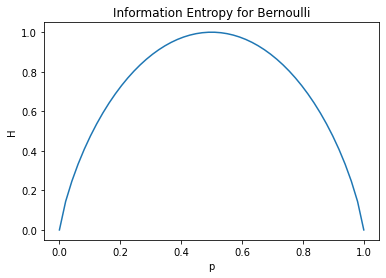

In [3]:
## In this example we get used to to concept of Entropy for simple probability distributions
## We examine the case for a Bernoulli distribution with parameter p

def Bernoulli_entropy(p):
    if p==0 or p==1:
        H = 0
    else:    
        H = p * np.log(p)/np.log(2) + (1-p) * np.log(1-p)/np.log(2)
    return -H
    
H = []
for p in np.linspace(0,1):
    H.append(Bernoulli_entropy(p))

plt.plot(np.linspace(0,1),H)
plt.title('Information Entropy for Bernoulli')
plt.xlabel('p')
plt.ylabel('H')
plt.show()



When $p=0$, we have certainty that the event will never occur, and therefore the Entropy is 0. The same consideration holds for $p=1$. When $p=0.5$, the uncertainty is maximum since the knowledge of the previous outcomes would not help in reducing our uncertainty over the next outcomes. Intermediate values fall between these cases, as the observations of the outcomes would give us an advantage on the prediction of the next outcomes.

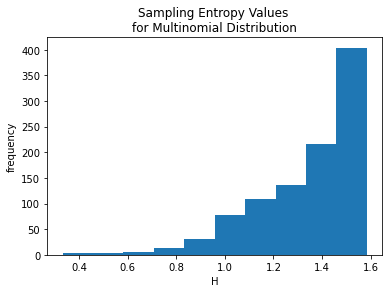

In [3]:
## We now extend the previous example to the multinomial distribution

def Multinomial_entropy(p):
    H = 0
    for pi in p:
        if pi==0:
            H += 0
        else:    
            H += pi * np.log(pi)/np.log(2) 
    return -H
    
H = []

## We now extend the previous example to the multinomial distribution

for i in range(1000):
    p = np.random.uniform(0,1,3)
    p = p/np.sum(p)
    H.append(Multinomial_entropy(p))

    
plt.hist(H)
plt.title('Sampling Entropy Values \nfor Multinomial Distribution')
plt.xlabel('H')
plt.ylabel('frequency')
plt.show()

We note that in the multinomial case, the values of the Information Entropy can be much larger than the max value of 1 measured for the binomial case. This is consistent with the fact that Entrophy increases with the increase of the number of possible events.

We can exted the notion of Entropy to define a measure of _relative uncertainty_ between distributions. This measure is usually called _Divergence_: the additional uncertainty induced by using probabilities from one distribution to describe another distribution.

While there are different possible notions of divergence, the standard measure is the __Kullback-Leibler__ divergence (or KL divergence).  The KL divergence between two probabilitiy distributions $p$ and $q$ is defined as:  

$$D_{KL}(p,q) = \sum_{i} p_i \log(\frac{p_i}{q_i}).$$

We note that $$D_{KL}(p,q)$$ can be decomposed as:

$$D_{KL}(p,q)  = \sum_{i} p_i (\log({p_i}) - \log({q_i})) = \sum_{i} p_i \log({p_i}) - \sum_{i} p_i \log({q_i}) = H(p,q) - H(p).$$

The KL divergence therefore quantifies the difference between the cross-entropy between $p$ and $q$, and the entropy of $p$.

What is the KL divergence between a distribution $p$ and itself? It is easy to show:

$$ D_{KL}(p,p) =  \sum_{i} p_i \log({p_i}) - \sum_{i} p_i \log({p_i}) = 0$$

Moreover, the KL divergence is strictly non-negative. For any probability distributions $p$ and $q$:

$$ D_{KL}(p,q) \geq 0 $$


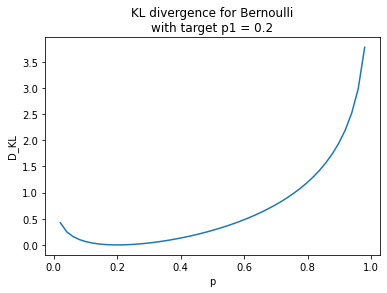

In [4]:
## Let's the target distribution be a Bernoulli with p1 = 0.2
## We want to compute the KL divergence between this target and an other Bernoulli with parameter p2

def KL_Bernoulli(p1,p2):
    if p2 > 0 and p2 <1: 
        H =  p1*np.log(p1)/np.log(2) - p1*np.log(p2)/np.log(2)
        H += (1-p1) * np.log(1-p1)/np.log(2) - (1-p1)*np.log(1-p2)/np.log(2)
    else: 
        H = np.nan
    return H

p1 = 0.2

H = []
for p2 in np.linspace(0,1):
    H.append(KL_Bernoulli(p1,p2))

plt.plot(np.linspace(0,1),H)
plt.title('KL divergence for Bernoulli\nwith target p1 = ' + str(p1))
plt.xlabel('p')
plt.ylabel('D_KL')
plt.show()



We note that the KL divergence is 0 when the two distributions are exactly the same, i.e. when the parameter $p_1 = p_2$. In all the other cases, the KL increases up to infnite. By definition, the KL divergence is infinite when the support of $p$ is not contained in the support of $q$. 

What does it mean that two distributions have infinite divergence? If $q_i=0$ for a non-zero $p_i$, this means that the event $p_i$ is not contemplated by $q$ (it has indeed probability 0). Therefore the degree of divergence beetwen the distributions is maximum. We note that this discrepancy is not symmetric. If $p_i=0$, for any value of $q_i$ the KL term would be $p_i\log(q_i) = 0$. For events not contemplated by $p$ the KL divergence doesn't care about which probability $q$ is going to assign to them.

This observation points out to the asymmetry of the KL divergence:

$$ D_{KL}(p,q) \neq D_{KL}(q,p). $$

In [5]:
print('p  = B(0.2), q = B(0.6)')
print('KL(p,q) = {}'.format(KL_Bernoulli(0.2,0.6)))
print('KL(q,p) = {}'.format(KL_Bernoulli(0.6,0.2)))

p  = B(0.2), q = B(0.6)
KL(p,q) = 0.48300749985576885
KL(q,p) = 0.5509775004326934


## Information Theory for model selection

Now that we understood how to evaluate the difference between distributions, we can turn to the problem of model selection. Let's assume that two different models, $f_1$ and $f_2$, provide us two different predictive distributions $q_1$ and $q_2$ for the observed variables. It is natural to compare the models in terms of their KL divergence with respect to the real data distribution $p$. So, we could compute $D_{KL}(p,q_1)$ and $D_{KL}(p,q_2)$ and assess which model provides the lowest divergence value. The problem is that the data distribution $p$ is not known.

We note that since:

$$ D_{KL}(p,q_1)  = \sum_{i} p_i \log({p_i}) - \sum_{i} p_i \log({{q_1}_i}), $$

and 

$$ D_{KL}(p,q_2)  = \sum_{i} p_i \log({p_i}) - \sum_{i} p_i \log({{q_2}_i}), $$

the two measures of KL divergences differ only for the quantities $\sum_{i} p_i \log({{q_1}_i})$ and $\sum_{i} p_i \log({{q_2}_i})$. In particular, the differences between the divergences of the two models depends exlusively from the models log-likelihood $\log(q_1)$ and $\log(q_2)$. 

This consideration leads us to the definition of model's __deviance__: $D(q) = -2*\sum_i \log(q_i)$.
In this case, we would select the one with best (lowest) deviance.

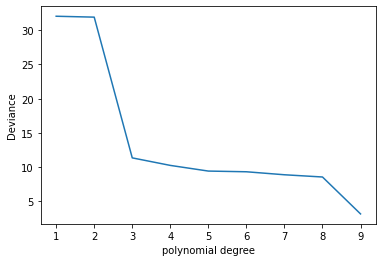

In [6]:
def Gaussian_loglik(x,y,w,sigma2):
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

def fit_poly(x,y,d):
    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

N = 30
noise = 0.3
x = np.random.uniform(0,1,N)
y = np.sin(x*3) + noise * np.random.randn(N)


loglik = []
for d in range(1,10):
    x_poly = np.array([x**i for i in range(d)]).T
    w_ml, sigma2_ml = fit_poly(x_poly,y,d)
    loglik.append(Gaussian_loglik(x_poly,y,w_ml,sigma2_ml))

deviance = -2*np.array(loglik)
plt.plot(range(1,10), deviance)
plt.ylabel('Deviance')
plt.xlabel('polynomial degree')
plt.show()


We note that the deviance behaves similarly to other measures of fit: it improves with model complexity, i.e. when the model is more likely to overfit.

As we have seen in the previous lessons, the problem leads to a discrepancy when comparing the performance during training and when testing in out-of-sample cases.

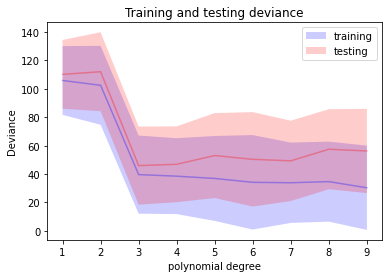

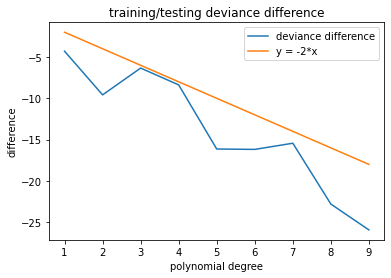

In [7]:
# As we know there is a difference between training and testing fit
training_deviance = []
testing_deviance = []

training_sd = []
testing_sd = []

N = 100
max_d = 10

for d in range(1,max_d):
    training_ll = []
    testing_ll = []
    for i in range(100):
        x_train = np.random.uniform(0,1,N)
        y_train = np.sin(x_train*3) + noise * np.random.randn(N)
        x_train_poly = np.array([x_train**i for i in range(d)]).T
        w_ml, sigma2_ml = fit_poly(x_train_poly,y_train,d)
        training_ll.append(Gaussian_loglik(x_train_poly,y_train,w_ml,sigma2_ml))
    
        x_test = np.random.uniform(0,1,N)
        y_test = np.sin(x_test*3) + noise * np.random.randn(N)
        x_test_poly = np.array([x_test**i for i in range(d)]).T
        testing_ll.append(Gaussian_loglik(x_test_poly,y_test,w_ml,sigma2_ml))
    
    training_deviance.append(np.mean(-2*np.array(training_ll)))
    testing_deviance.append(np.mean(-2*np.array(testing_ll)))
    
    training_sd.append(np.std(-2*np.array(training_ll)))
    testing_sd.append(np.std(-2*np.array(training_ll)))

training_deviance = np.array(training_deviance)
testing_deviance = np.array(testing_deviance)
  
training_sd = np.array(training_sd)
testing_sd = np.array(testing_sd)
    
plt.title('Training and testing deviance')
plt.plot(range(1,max_d), training_deviance, color='blue', alpha = 0.3)
plt.plot(range(1,max_d), testing_deviance, color='red', alpha = 0.3)
plt.fill_between(range(1,max_d), training_deviance - 2*training_sd, 
                 training_deviance + 2*training_sd, label = 'training', facecolor='blue', alpha=0.2,)
plt.fill_between(range(1,max_d), testing_deviance - 2*testing_sd, 
                  testing_deviance + 2*testing_sd, label = 'testing', facecolor='red', alpha=0.2,)
plt.ylabel('Deviance')
plt.xlabel('polynomial degree')
plt.legend()
plt.show()


plt.title('training/testing deviance difference')
plt.plot(range(1,max_d), [training_deviance[i] - testing_deviance[i] for i in range(len(testing_deviance))], label = 'deviance difference')
plt.plot(range(1,max_d), -2* np.array(range(1,max_d)), label = 'y = -2*x')
plt.ylabel('difference')
plt.xlabel('polynomial degree')
plt.legend()
plt.show()

There is an interesting fact about the previous experiment: the difference between training and testing deviance is in the order of twice the number of parameters of the polynomial model.  

This observation motivates the  __Akaike information criterion__ (AIC). The AIC provides us a very simple estimate of the out-of-sample deviance:

$$ AIC = D_{train} + 2*N_{parameters} $$

In [8]:
print(training_deviance)
print(2 * np.arange(1,max_d))

AIC = training_deviance + 2 * np.arange(1,max_d)

print(AIC)

[105.91565863 102.52251016  39.61632699  38.5105495   36.90126486
  34.18185883  33.87149322  34.67212211  30.32554403]
[ 2  4  6  8 10 12 14 16 18]
[107.91565863 106.52251016  45.61632699  46.5105495   46.90126486
  46.18185883  47.87149322  50.67212211  48.32554403]


No handles with labels found to put in legend.


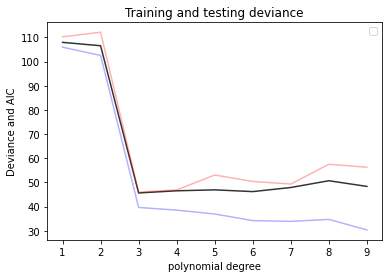

In [9]:
plt.title('Training and testing deviance')
plt.plot(range(1,max_d), training_deviance, color='blue', alpha = 0.3)
plt.plot(range(1,max_d), AIC, color='black', alpha = 0.8)
plt.plot(range(1,max_d), testing_deviance, color='red', alpha = 0.3)
# plt.fill_between(range(1,max_d), training_deviance - 2*training_sd, 
#                  training_deviance + 2*training_sd, label = 'training', facecolor='blue', alpha=0.2,)
# plt.fill_between(range(1,max_d), testing_deviance - 2*testing_sd, 
#                   testing_deviance + 2*testing_sd, label = 'testing', facecolor='red', alpha=0.2,)
plt.ylabel('Deviance and AIC')
plt.xlabel('polynomial degree')
plt.legend()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


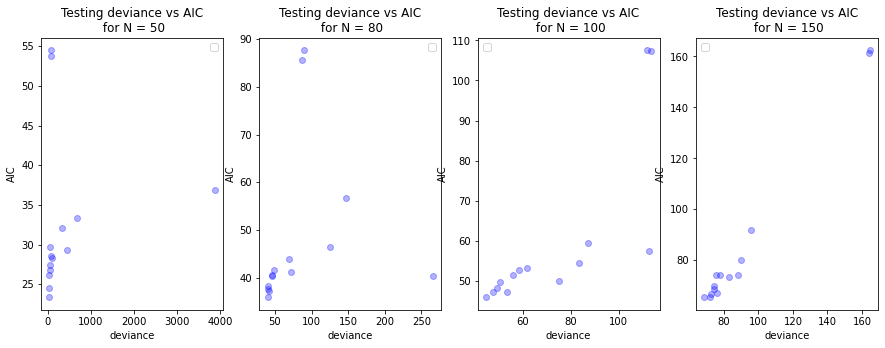

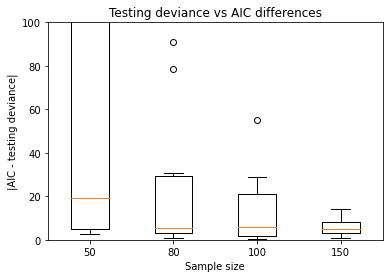

In [10]:
# As we know there is a difference between training and testing fit

abs_differences = []

sample_size = [ 50, 80, 100,150]
max_d = 15

fig = plt.figure(figsize=(15, 5))

for idx,N in enumerate(sample_size):

    training_deviance = []
    testing_deviance = []
    AIC = []

    for d in range(1,max_d):
        training_ll = []
        testing_ll = []
        for i in range(100):
            x_train = np.random.uniform(0,1,N)
            y_train = np.sin(x_train*3) + noise * np.random.randn(N)
            x_train_poly = np.array([x_train**i for i in range(d)]).T
            w_ml, sigma2_ml = fit_poly(x_train_poly,y_train,d)
            training_ll.append(Gaussian_loglik(x_train_poly,y_train,w_ml,sigma2_ml))
    
            x_test = np.random.uniform(0,1,N)
            y_test = np.sin(x_test*3) + noise * np.random.randn(N)
            x_test_poly = np.array([x_test**i for i in range(d)]).T
            testing_ll.append(Gaussian_loglik(x_test_poly,y_test,w_ml,sigma2_ml))
    
        training_deviance.append(np.mean(-2*np.array(training_ll)))
        testing_deviance.append(np.mean(-2*np.array(testing_ll)))
    
        AIC.append(np.mean(-2*np.array(training_ll)) + 2*d)

    training_deviance = np.array(training_deviance)
    testing_deviance = np.array(testing_deviance)
    AIC = np.array(AIC)
    
    plt.subplot(1, len(sample_size), idx +1)
    plt.title('Testing deviance vs AIC\n for N = {}'.format(N))
    plt.scatter(testing_deviance, AIC, color='blue', alpha = 0.3)
    plt.xlabel('deviance')
    plt.ylabel('AIC')
    plt.legend()

    
    abs_differences.append(np.abs(testing_deviance- AIC))
plt.show()

plt.title('Testing deviance vs AIC differences')
plt.boxplot(abs_differences)
plt.ylim(0,100)
plt.xticks(range(1,len(sample_size)+1), sample_size)
plt.xlabel('Sample size')
plt.ylabel('|AIC - testing deviance|')
plt.show()    


We observe that the AIC gets closer to the testing deviance when the sample size increases. This is a known property as AIC is a realiable approximation when:

- The sample size $N$ is _much_ greater than the number of parameters $d$
- The predictive distribution is approximatively Gaussian
- The prior are overwhelmed by the likelihood

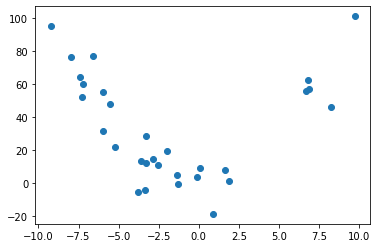

In [21]:
x = np.random.uniform(-10,10,30)
sigma = 10
y = x**2 + sigma*np.random.randn(30)

plt.scatter(x,y)